# Setup and Imports Firstly

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('insurance.csv')
df.head()
# Head shows the first 5 rtows of the DataFrame

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Checking Basic Infos and Preprocessing 

In [3]:
df.info()
df.isnull().sum()
# Checking for null values in the DataFrame
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [4]:
# Checking Basic Infos and Preprocessing (Giving Male - 1 and Female - 0 & smoker - 1 and non-smoker - 0)
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df['smoker'] = df['smoker'].map({'no': 0, 'yes': 1})
df = pd.get_dummies(df, columns=['region'], drop_first=True)


In [5]:
# Standardize BMI and Age
df['age'] = (df['age'] - df['age'].mean()) / df['age'].std()
df['bmi'] = (df['bmi'] - df['bmi'].mean()) / df['bmi'].std()
df['children'] = (df['children'] - df['children'].mean()) / df['children'].std()



# My Favourite Section ---> EDA

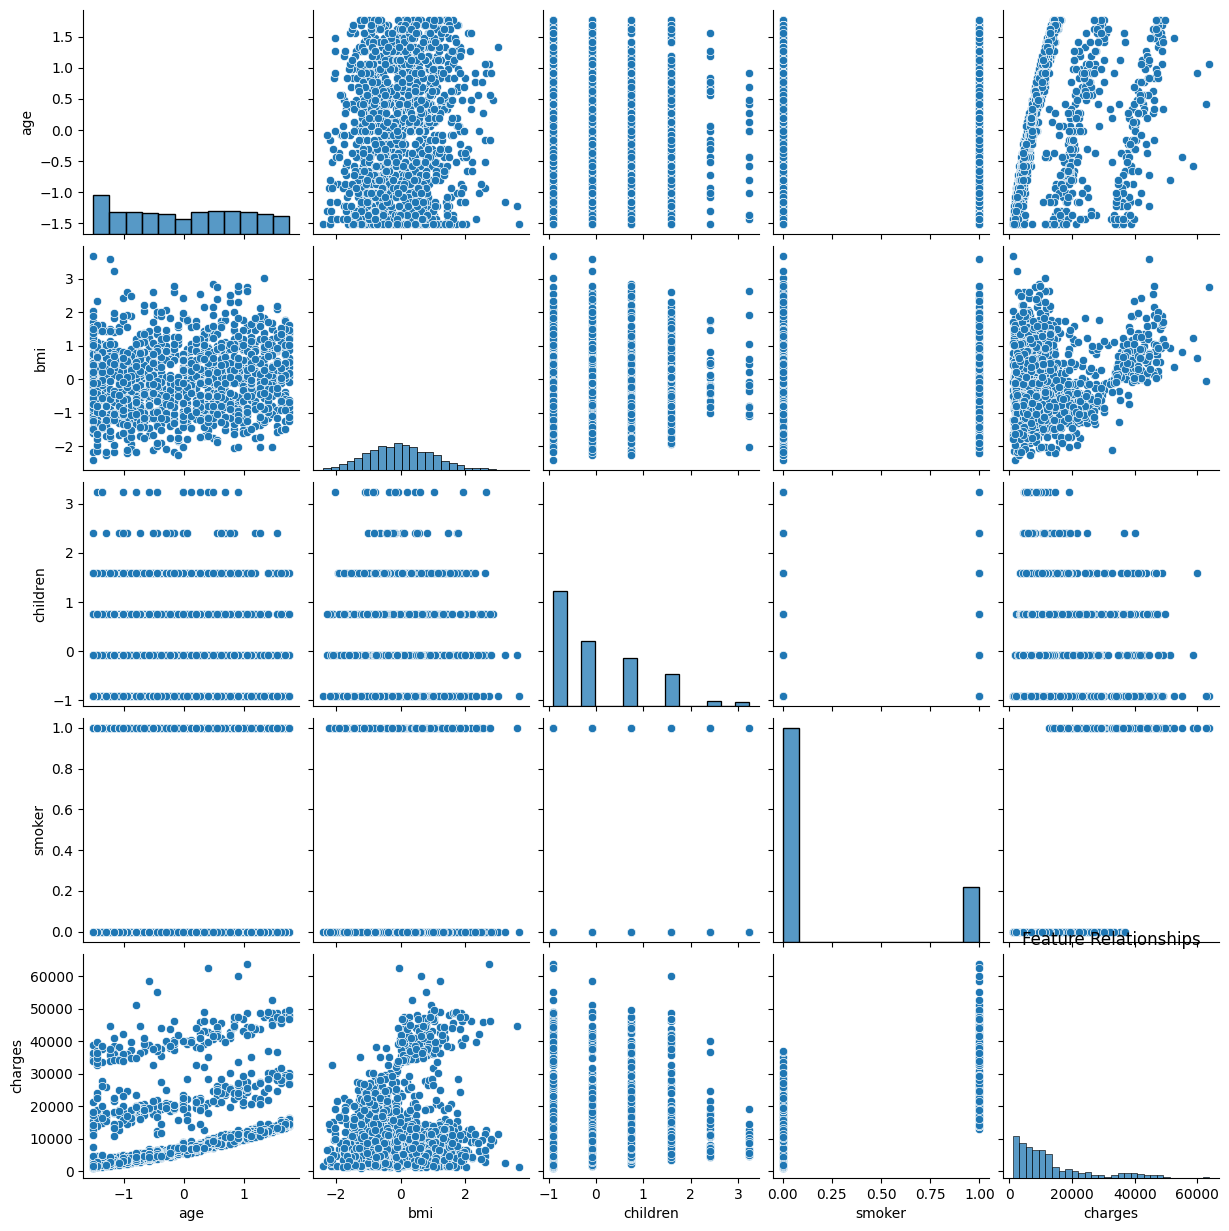

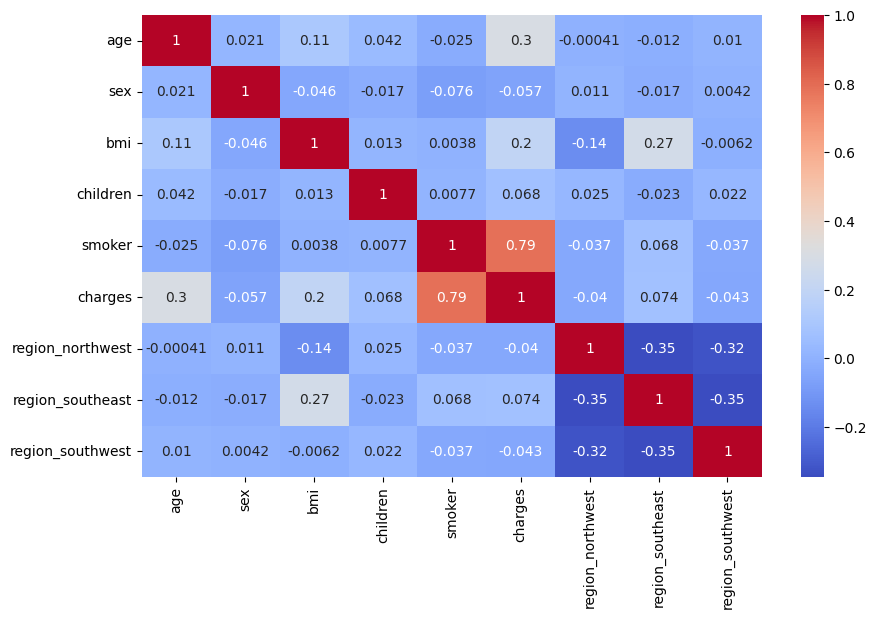

In [6]:
sns.pairplot(df[['age', 'bmi', 'children', 'smoker', 'charges']])
plt.title("Feature Relationships")

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


# Prepare Inputs & Outputs

In [7]:
selected = ['age', 'bmi', 'smoker']
X = df[selected].values

y = df['charges'].values.reshape(-1, 1).astype(float)


X = np.hstack((np.ones((X.shape[0], 1)), X))  # Add bias column
X = X.astype(float)



In [8]:
# MSE function - Mean Squared Error
# This function calculates the mean squared error between true and predicted values.
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)


In [9]:
# Implementing R^2 function - Coefficient of Determination
# This function calculates the R^2 score, which indicates how well the model explains the variance
def r2_score(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ss_res / ss_tot) if ss_tot != 0 else float('nan')



In [10]:
# Training function for Linear Regression
# This function trains a linear regression model using gradient descent.
def train(X, y, lr=0.01, epochs=1000, l2=0.0):
    m, n = X.shape
    W = np.random.randn(n, 1)
    losses = []

    for i in range(epochs):
        y_pred = X @ W
        loss = mse(y, y_pred) + l2 * np.sum(W[1:]**2)
        losses.append(loss)

        grad = (2/m) * X.T @ (y_pred - y)
        grad[1:] += 2 * l2 * W[1:]  # L2 penalty
        W -= lr * grad

        if i % 100 == 0:
            print(f"Epoch {i}: Loss = {loss:.2f}")
    return W, losses


In [11]:
# Ensure X and y are of correct numeric types
X = X.astype(float)
y = y.astype(float)


In [12]:
X = df.drop('charges', axis=1).values
y = df['charges'].values.reshape(-1, 1)

# Fix: ensure numeric types
X = np.hstack((np.ones((X.shape[0], 1)), X))  # Add bias term
X = X.astype(float)
y = y.astype(float)


# Finally Training Time

In [17]:
# Training the model using gradient descent with L2 regularization
W, losses = train(X, y, lr=0.001, epochs=10000, l2=1)




Epoch 0: Loss = 322570844.00
Epoch 100: Loss = 234364942.17
Epoch 200: Loss = 190848473.50
Epoch 300: Loss = 167927692.78
Epoch 400: Loss = 154855780.82
Epoch 500: Loss = 146750437.21
Epoch 600: Loss = 141329817.09
Epoch 700: Loss = 137481722.61
Epoch 800: Loss = 134631733.48
Epoch 900: Loss = 132460967.56
Epoch 1000: Loss = 130777803.09
Epoch 1100: Loss = 129458038.45
Epoch 1200: Loss = 128415905.92
Epoch 1300: Loss = 127589289.87
Epoch 1400: Loss = 126931686.72
Epoch 1500: Loss = 126407502.48
Epoch 1600: Loss = 125989096.23
Epoch 1700: Loss = 125654798.66
Epoch 1800: Loss = 125387514.71
Epoch 1900: Loss = 125173700.31
Epoch 2000: Loss = 125002592.98
Epoch 2100: Loss = 124865622.57
Epoch 2200: Loss = 124755954.28
Epoch 2300: Loss = 124668131.14
Epoch 2400: Loss = 124597792.60
Epoch 2500: Loss = 124541452.02
Epoch 2600: Loss = 124496320.22
Epoch 2700: Loss = 124460165.08
Epoch 2800: Loss = 124431199.81
Epoch 2900: Loss = 124407993.80
Epoch 3000: Loss = 124389401.40
Epoch 3100: Loss = 1

# Moment Of truth

In [19]:
# Predict using learned weights
y_pred = X @ W
# Evaluate performance using R² score
print("R² Score:", r2_score(y, y_pred))

R² Score: 0.2575576113563215


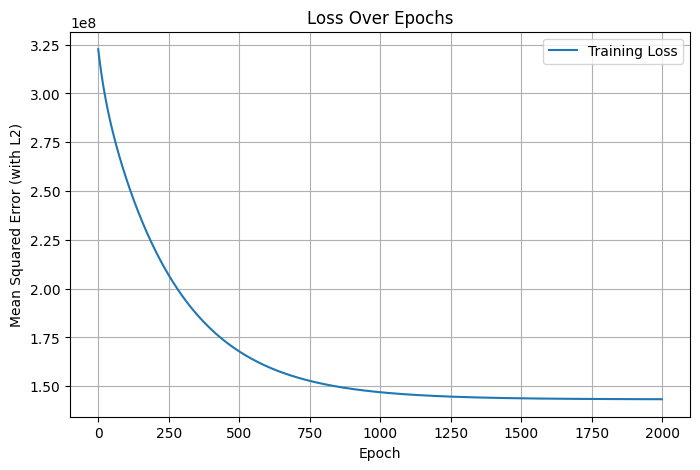

In [18]:

# Plot training loss over epochs
plt.figure(figsize=(8, 5))
plt.plot(losses, label='Training Loss')
plt.title("Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error (with L2)")
plt.grid(True)
plt.legend()
plt.show()

In [19]:
print("y shape:", y.shape)
print("y min:", np.min(y))
print("y max:", np.max(y))
print("y mean:", np.mean(y))
print("y std:", np.std(y))


y shape: (1338, 1)
y min: 1121.8739
y max: 63770.42801
y mean: 13270.422265141257
y std: 12105.484975561612


In [20]:
print(df.columns)


Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')


<Axes: >

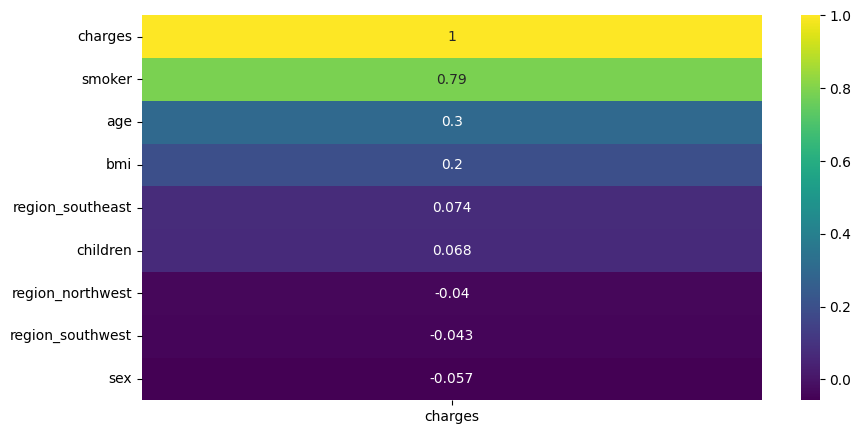

In [21]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr()[['charges']].sort_values('charges', ascending=False), annot=True, cmap='viridis')
